 # Webscraping Project

In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.plotly as py
import math
from IPython.display import Image
import pandas as pd
import pylab as pl
import numpy as np
import json
import ggplot
import googlemaps
import seaborn as sns
import re
import time
import cython
from gensim.models import doc2vec
import nltk
import re
from stemming.porter2 import stem


# Quotes & Auhors

<img src="imgs/quotes.png" height="900" width="900">

# Numbers

<img src="imgs/comets.png" height="800" width="800">

# Atlab Stem Academy
<img src="imgs/atlab_viewrowimage_target.jpeg" height="900" width="900">

In [549]:
Stem_A = pd.read_csv("Atlabs_LLc.csv")
Stem_A = Stem_A.drop('Unnamed: 0',1)
Stem_A.head()

,Age Group,Lattitude,Longitude,Product Brand,ORDER.ID,Product.Name,Price...AED..,Description
0,9.0,31.170362,120.661995,XYZ,3DXYZCP2ADV,3D Printer Advance Classroom pack,32000,This classroom pack consist of \r\n10 No of Da...
1,9.0,31.170362,120.661995,XYZ,3DXYZCP1,3D Printer Classroom pack,23600,This classroom pack consist of: \r\n9 No of Da...
2,6.0,55.732771,9.119231,LEGOEducation,45110,BuildToExpress Core Set,213,The set includes over 200 LEGO elements in a s...
3,6.0,55.732771,9.119231,LEGOEducation,2045110,BuildToExpress Guide & Activity Pack,581,Contains practical guidance on introducing and...
4,10.0,31.170360,120.662000,XYZ,3FM1XXAE00K,da Vinci Minimaker,1500,*Printers would be available in 4 - 6 weeks*\r...


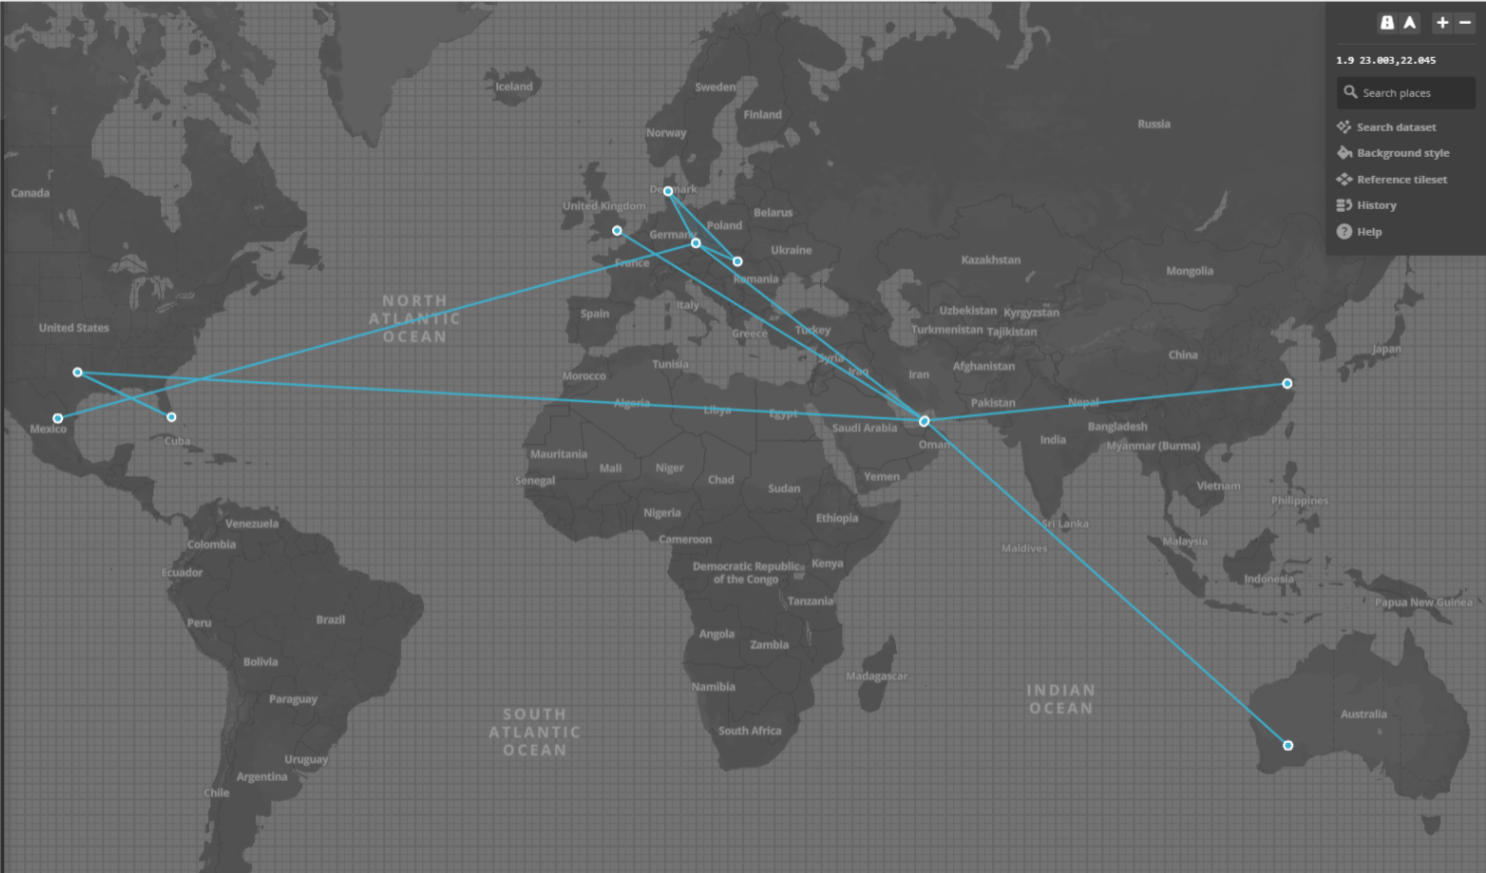

In [550]:
Image(filename='imgs/Sketch.png')

# Type of Products ATLAB buy from Each Brand 

In [300]:
import plotly.plotly as py
import pandas as pd

df_ats = pd.read_csv('Atlabs_LLc.csv')
df_ats.head()

df_fs = pd.read_csv('Atlabs_LLc.csv')
df_fs.head()

ats = [ dict(
        type = 'scattergeo',
        locationmode = 'World',
        lon = df_ats['Longitude'],
        lat = df_ats['Lattitude'],
        hoverinfo = 'text',
        text = df_ats['Product Brand'],
        mode = 'markers',
        marker = dict( 
            size=10, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        


fig = ats
py.iplot( fig )

In [303]:
no_product = lambda x: sum(Stem_A['Product Brand']==x)

In [304]:
Sum_Products = []
for i in Stem_A['Product Brand']:
    Sum_Products.append(no_product(i)) 

# ATLAB's Products

In [305]:
df1 = Stem_A.drop(['Longitude','Lattitude','ORDER.ID','Description'],1)


In [306]:
df1 = df1.set_index('Product.Name')

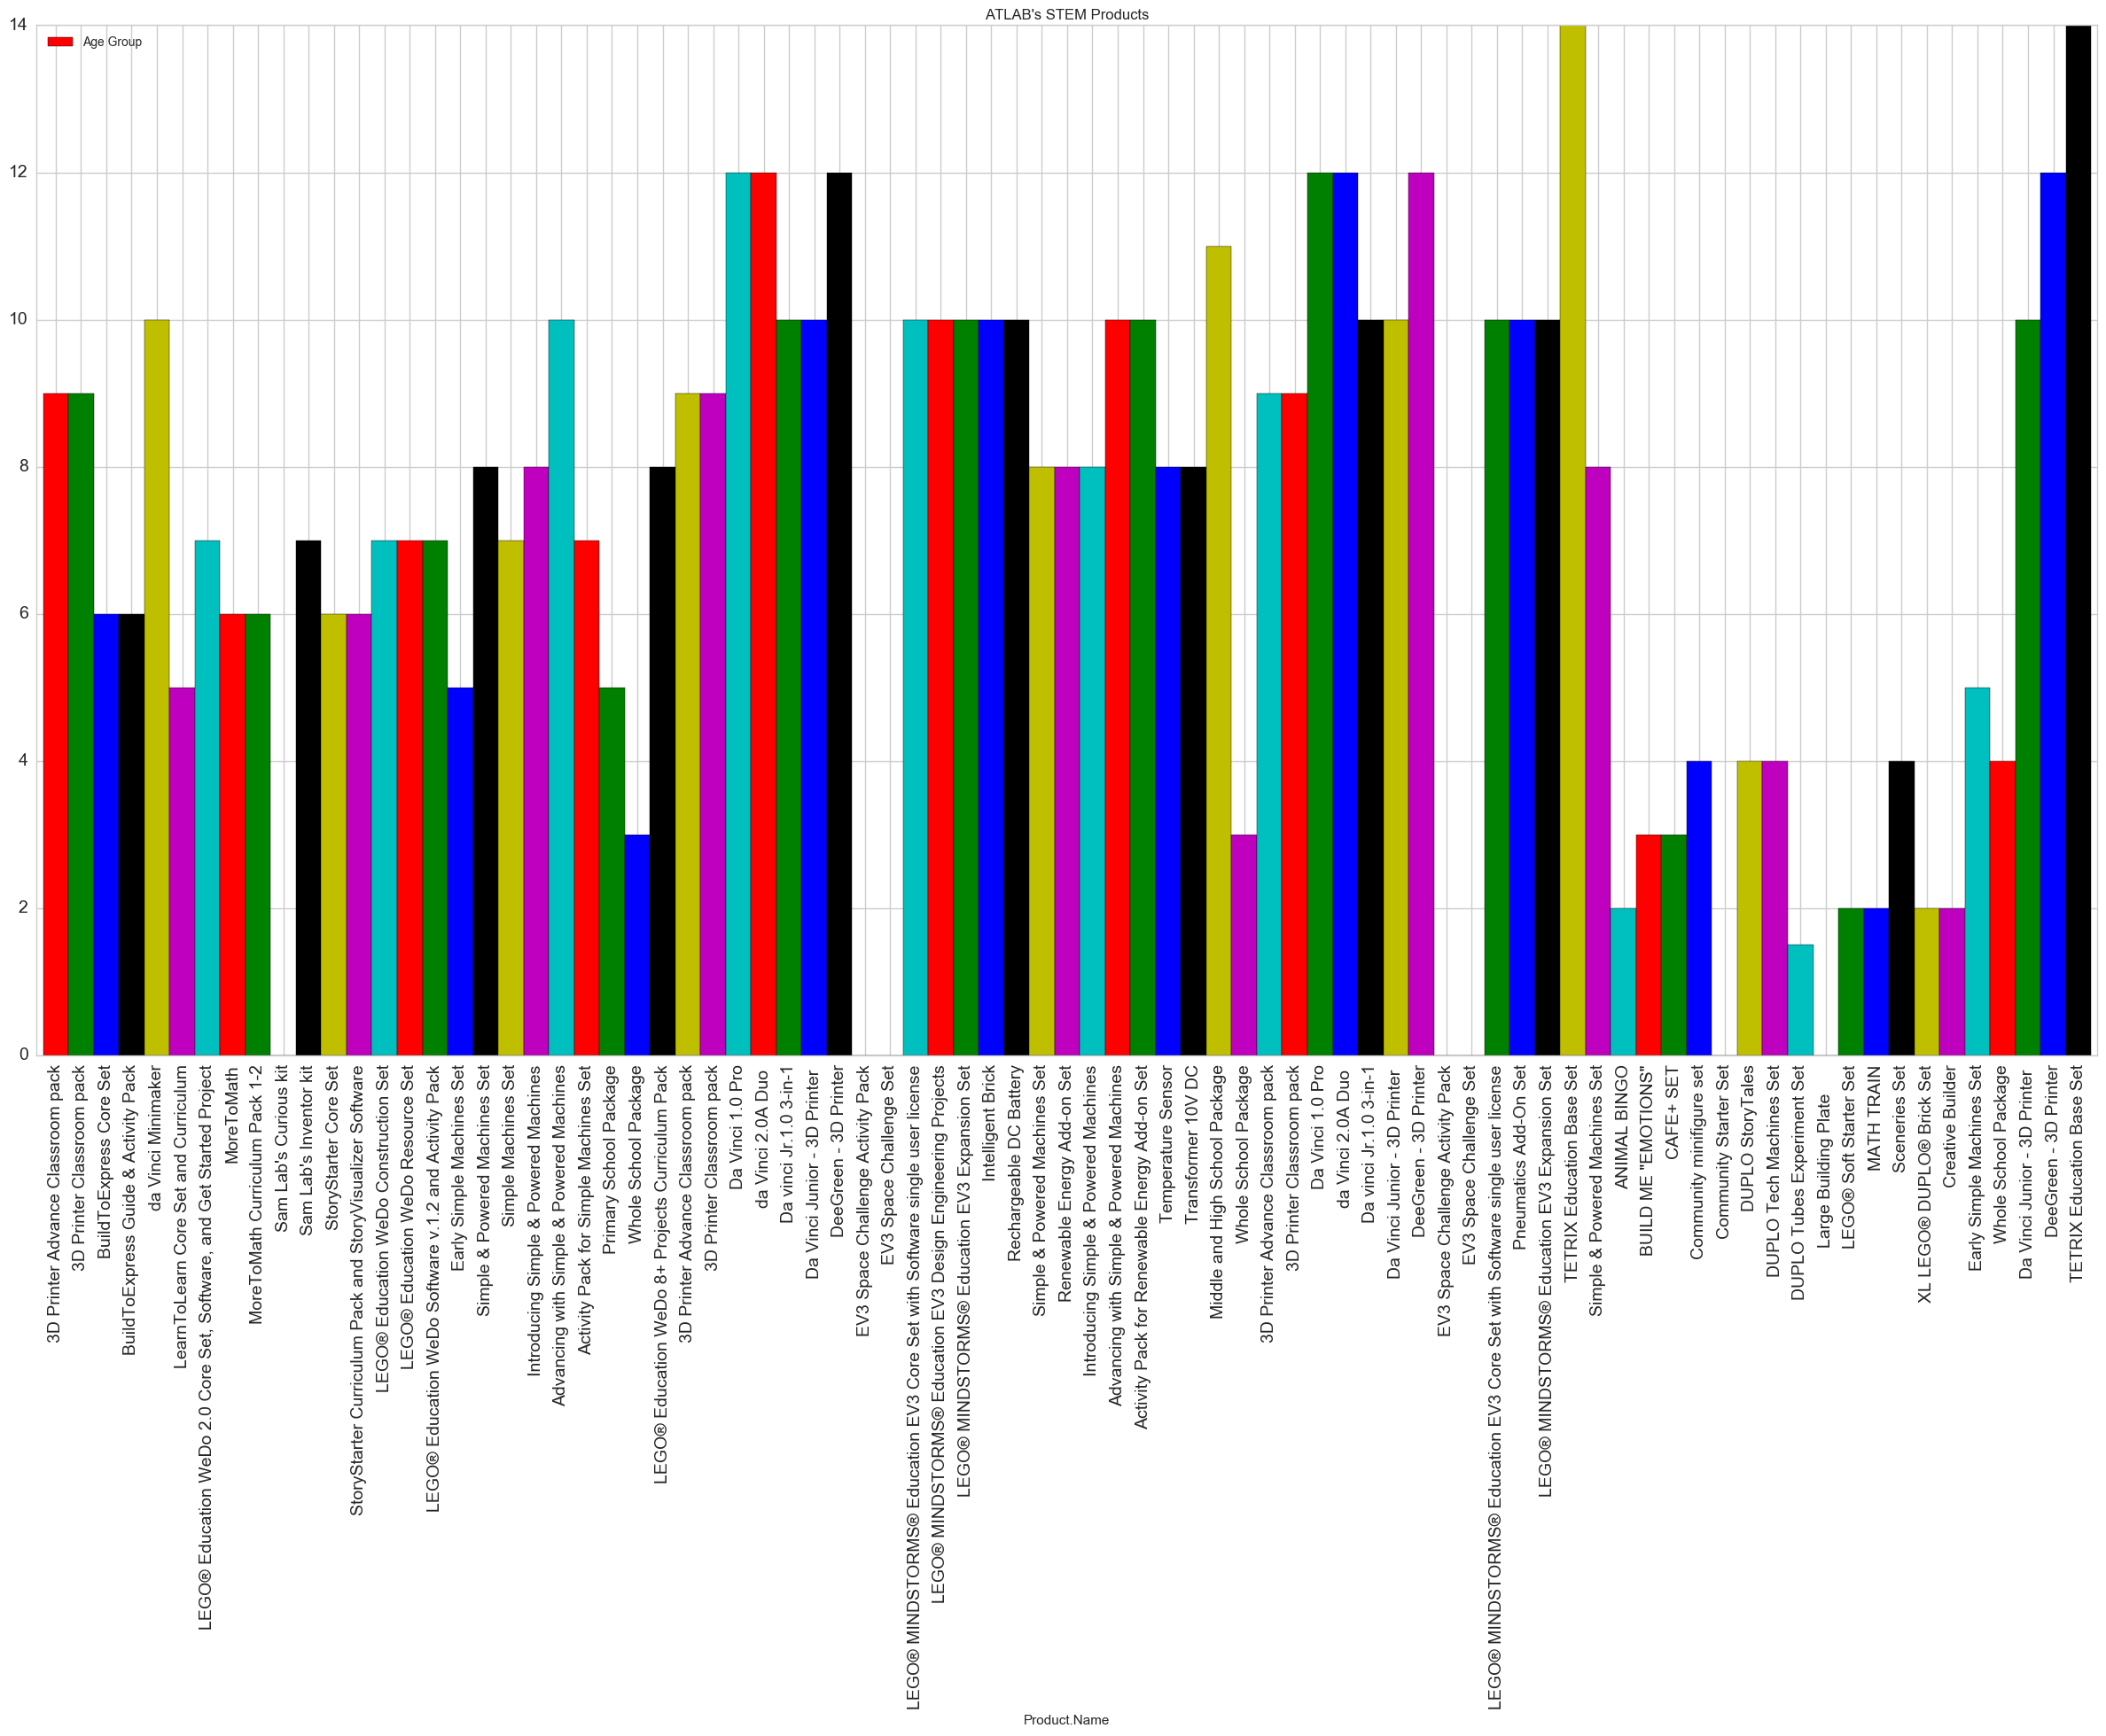

In [307]:
df=df1['Age Group']
my_colors = 'rgbkymc'
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
df.plot.bar(legend=True,figsize=(30,15),width=1,fontsize=14,stacked=True,color=my_colors,title="ATLAB's STEM Products")


# For Every 100 Product Purchased

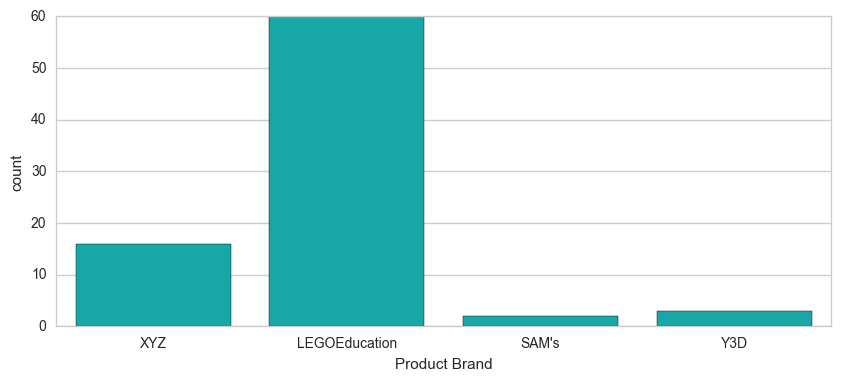

In [308]:
f, ax = plt.subplots(figsize=(10, 4),)
sns.countplot(Stem_A['Product Brand'],color='c')

# Spread of Spending 

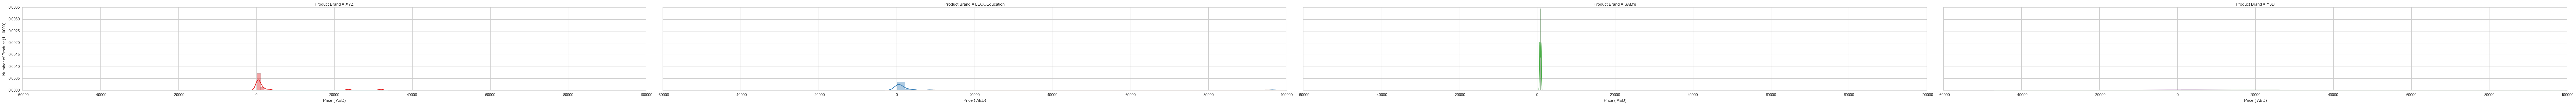

In [309]:
BrandGrid = sns.FacetGrid(Stem_A, col='Product Brand',hue='Product Brand',margin_titles=True,palette="Set1",size=4, aspect=6,)
BrandGrid.map(sns.distplot,'Price...AED..');
BrandGrid.set_axis_labels("Price ( AED)", "Number of Product (1:10000)")


# Overall Spending 

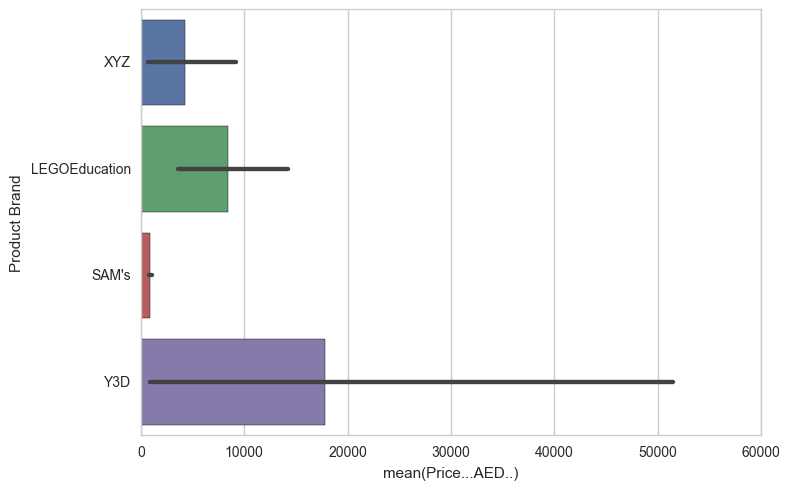

In [310]:
sns.set(style = 'whitegrid')
sns.barplot(x = 'Price...AED..', y = 'Product Brand', data = Stem_A)

# Total Spending Over Set Of 100 Products = AED 639000 == Dollar 174,200

In [311]:
Total_spending = sum(Stem_A['Price...AED..'])
Total_spending

630381

# Comparison Of Supplier to ATLAB'S Product Price

In [312]:
sam_lab = pd.read_csv("SAM_LAB.csv")
sam_lab = sam_lab.drop(['Unnamed: 0'],1)

In [ ]:
Lego_edu = pd.read_csv("Lego_Education.csv")
Lego_edu = Lego_edu.drop(['Unnamed: 0'],1)

In [313]:
Table = Stem_A.drop(['Age Group','Lattitude','Longitude','ORDER.ID','Description'],1)

In [ ]:
Atlab_Stem = Atlab_Stem.drop('Product Brand',1)

In [314]:
Atlab_Stem = Table[Table['Product Brand']=='LEGOEducation']

In [315]:
b=[]
for j in Lego_edu['Lego Edu Product']:
    b.append(j.replace(' ','').lower())

In [316]:
a = []
for i in Atlab_Stem['Product.Name']:
    a.append(i.replace(' ','').lower())

In [317]:
result = []
for i in a:
    if i in b:
        result.append(i)

In [322]:
Atlab_Stem = Atlab_Stem[Atlab_Stem.apply(lambda x: x['Product.Name'].lower().replace(' ','').replace('renewableenergyadd-onset','').replace('ev3spacechallengeset','').replace('pneumaticsadd-onset','') in result, axis=1)]

In [384]:
Lego_edu = Lego_edu[Lego_edu.apply(lambda x: x['Lego Edu Product'].lower().replace(' ','') in result, axis=1)]

In [410]:
Lego_edu=Lego_edu.sort_values(['Price (USD)'])

In [420]:
Lego_edu = Lego_edu.rename_axis(None)

In [419]:
Atlab_Stem = Atlab_Stem.rename_axis(None)

In [421]:
Atlab_Stem=Atlab_Stem.sort_values(['Price...AED..'])

In [422]:
price_atlab_stem = Atlab_Stem['Price...AED..']*0.2724

In [465]:
compare = pd.concat([price_atlab_stem,Lego_edu['Price (USD)']])

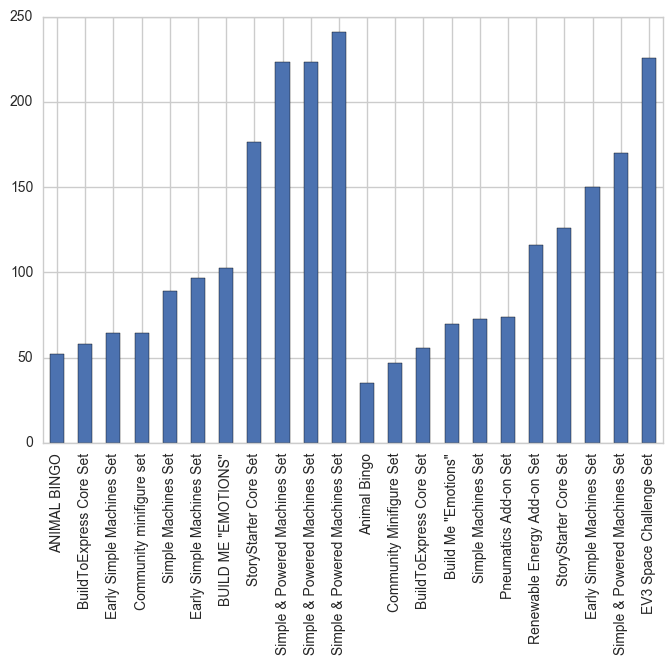

In [472]:
compare.plot.bar(stacked=True)

# No Reviews On the website
<img src="imgs/shop.png" height="900" width="900">

[Clickable_visible_hyperlink](https://www.youtube.com/watch?v=4wEJ1Tk4K30)

# Popular Products in Competetion 

<img src="imgs/amazon.jpg" height="50" width="50"><img src="imgs/forbes.jpg" height="50" width="50"><img src="imgs/gadgeteer.png" height="50" width="50"><img src="imgs/geekdad.jpg" height="50" width="50"><img src="imgs/gizmodo.jpeg" height="50" width="50">


#  Analysis for most Popular Product 

In [544]:
#r lke soft # #lego #use #mind 
class Label(object):
    def __iter__(self):
        for i, text in enumerate(open("first.txt")):
            s=['all', 'just', 'being', 'over', 'both','need','one','The','also' ,'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once']
            words=filter(lambda w: not w in s,text.lower().replace(',',' ').split())
            yield doc2vec.LabeledSentence(words, tags=['%s' % i])

mydocs = Label() 
model = doc2vec.Doc2Vec(mydocs, size = 200, window = 8, min_count = 5, workers = 4) 
model.save('first.model')
model = doc2vec.Doc2Vec.load('first.model') 

In [558]:
print model.most_similar(positive=["lego","use"], negative=["mindstorms"], topn=3) 

[('robot', 0.9999639987945557), ('ev3', 0.9999626874923706), ('like', 0.9999610781669617)]





# How many article agree or disagree

In [591]:
def cossim(v1, v2):
    return np.dot(v1, v2) / np.sqrt(np.dot(v1, v1)) / np.sqrt(np.dot(v2, v2))
def get_line(filename, n):
    with open(filename) as f:
        for i, e in enumerate(f):
            if i == n:
                return e
    
input_text = "EV3,good"
input_vec = model.infer_vector(seperate_words(input_text)) 

In [592]:
cossims_with_input = map(lambda v: cossim(input_vec, v), model.docvecs)

In [593]:
def argmaxn(l, n):
    l_copy = list(l)
    args = []
    for i in range(n):
        arg = np.argmax(l_copy)
        args.append(arg)
        l_copy[arg] = -float('inf')
        return args 

In [594]:
sim_ids = argmaxn(cossims_with_input, 3)
for i in range(3):
    print "(Review-%s, Similarity:%.4f):" % (sim_ids[i] + 1, cossims_with_input[sim_ids[i]]),
    get_line('first.txt', sim_ids[i])

(Review-15, Similarity:0.1936):

IndexError: list index out of range

# Thank You
Good Luck 